## THE BASICS - Importing, train/test split

In [2]:
import numpy as np
import pandas as pd

In [3]:
main_df = pd.read_csv('data/df', index_col=0)

In [4]:
main_df

,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"['mention', '3g', 'iphone', '3', 'hrs', 'tweet...","['mention', '3g', '3', 'hrs', 'tweeting', 'ris...","['3g', 'hrs', 'tweeting', 'rise_austin', 'dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"['mention', 'know', 'mention', 'awesome', 'ipa...","['mention', 'know', 'mention', 'awesome', 'app...","['know', 'awesome', 'likely', 'appreciate', 'd..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"['mention', 'wait', 'ipad', '2', 'also', 'sale...","['mention', 'wait', '2', 'also', 'sale', 'sxsw']","['wait', 'also', 'sale']"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"['mention', 'hope', 'year', 'festival', 'crash...","['mention', 'hope', 'year', 'festival', 'crash...","['hope', 'year', 'festival', 'crashy', 'year']"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['great', 'stuff', 'fri', 'marissa', 'mayer', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['everywhere', 'sxsw', 'link']",['everywhere']
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'interrupt', 'regularly', 'sc..."
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"['google', 'zeiger', 'physician', 'never', 're...","['zeiger', 'physician', 'never', 'reported', '...","['zeiger', 'physician', 'never', 'reported', '..."
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"['verizon', 'iphone', 'customers', 'complained...","['verizon', 'customers', 'complained', 'time',...","['verizon', 'customers', 'complained', 'time',..."


In [5]:
# convert lists back into form from strings after import (because import treats list as strings)


import ast
main_df['tokens'] =[ast.literal_eval(x) for x in main_df['tokens'] ]
main_df['tokens_sparse'] =[ast.literal_eval(x) for x in main_df['tokens_sparse'] ]
main_df['tokens_no_brands'] =[ast.literal_eval(x) for x in main_df['tokens_no_brands'] ]

In [6]:
main_df['sparse_joined'] = main_df['tokens_sparse'].apply(lambda x: " ".join(x))
main_df['tokens_joined'] = main_df['tokens'].apply(lambda x: " ".join(x))
main_df['no_brand_joined'] = main_df['tokens_no_brands'].apply(lambda x: " ".join(x))

In [7]:
type(main_df['tokens'].iloc[0])

list

In [8]:
main_df


,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse,sparse_joined,tokens_joined,no_brand_joined
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"[mention, 3g, iphone, 3, hrs, tweeting, rise_a...","[mention, 3g, 3, hrs, tweeting, rise_austin, d...","[3g, hrs, tweeting, rise_austin, dead, need, u...",3g hrs tweeting rise_austin dead need upgrade ...,mention 3g iphone 3 hrs tweeting rise_austin d...,mention 3g 3 hrs tweeting rise_austin dead nee...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"[mention, know, mention, awesome, ipad, iphone...","[mention, know, mention, awesome, app, likely,...","[know, awesome, likely, appreciate, design, al...",know awesome likely appreciate design also giv...,mention know mention awesome ipad iphone app l...,mention know mention awesome app likely apprec...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"[mention, wait, ipad, 2, also, sale, sxsw]","[mention, wait, 2, also, sale, sxsw]","[wait, also, sale]",wait also sale,mention wait ipad 2 also sale sxsw,mention wait 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"[mention, hope, year, festival, crashy, year, ...","[mention, hope, year, festival, crashy, year, ...","[hope, year, festival, crashy, year]",hope year festival crashy year,mention hope year festival crashy year iphone ...,mention hope year festival crashy year app men...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"[mention, great, stuff, fri, sxsw, marissa, ma...","[mention, great, stuff, fri, sxsw, marissa, ma...","[great, stuff, fri, marissa, mayer, tim, reill...",great stuff fri marissa mayer tim reilly tech ...,mention great stuff fri sxsw marissa mayer goo...,mention great stuff fri sxsw marissa mayer tim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[everywhere, sxsw, link]",[everywhere],everywhere,ipad everywhere sxsw link,everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled geek p...,wave buzz rt mention interrupt regularly sched...,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"[google, zeiger, physician, never, reported, p...","[zeiger, physician, never, reported, potential...","[zeiger, physician, never, reported, potential...",zeiger physician never reported potential ae y...,google zeiger physician never reported potenti...,zeiger physician never reported potential ae y...
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"[verizon, iphone, customers, complained, time,...","[verizon, customers, complained, time, fell, b...","[verizon, customers, complained, time, fell, 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= main_df.drop(columns=['emotion', 'emotion_label'], axis=1)
y= main_df['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 42, stratify = y)


In [11]:
y_test.shape, X_test.shape

((2673,), (2673, 15))

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size =.3, random_state = 42, stratify = y_test)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((6236, 15), (1871, 15), (6236,), (1871,), (802, 15), (802,))

In [14]:
df_pos = main_df.loc[(main_df['emotion']=='None')|(main_df['emotion']=='Positive')]
X= df_pos.drop(columns=['emotion', 'emotion_label'])
y= df_pos['emotion_label']

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,random_state=42, test_size= 0.3, stratify=y)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=.3, stratify= y_test2)

# Vectorization



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [17]:
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train['tokens_joined'])
X_test_vectorized = tfidf.transform(X_test['tokens_joined'])
#most common words
X_train_tfidf = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_test_tfidf = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())



In [22]:
type(X_train_vectorized)

scipy.sparse.csr.csr_matrix

In [ ]:
# tfidf2 = TfidfVectorizer()
# X_train2_vectorized = tfidf2.fit_transform(X_train2['sparse_joined'])
# X_test2_vectorized = tfidf2.transform(X_test2['sparse_joined'])
# X_train2_tfidf_sparse = pd.DataFrame.sparse.from_spmatrix(X_train2_vectorized, columns=tfidf2.get_feature_names())
# X_test2_tfidf_sparse = pd.DataFrame.sparse.from_spmatrix(X_test2_vectorized, columns=tfidf2.get_feature_names())

In [25]:
count_vec = CountVectorizer()
X_train_vectorized2 = count_vec.fit_transform(X_train['tokens_joined'])
X_test_vectorized2 = count_vec.transform(X_train['tokens_joined'])

X_train_cv =  pd.DataFrame.sparse.from_spmatrix(X_train_vectorized2, columns=count_vec.get_feature_names())
X_test_cv = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized2, columns=count_vec.get_feature_names())

In [19]:
count_vec2 = CountVectorizer()
X_train2_vectorized2 = count_vec2.fit_transform(X_train2['sparse_joined'])
X_test2_vectorized2 = count_vec2.transform(X_train2['sparse_joined'])

X_train2_cv_sparse =  pd.DataFrame.sparse.from_spmatrix(X_train2_vectorized2, columns=count_vec2.get_feature_names())
X_test2_cv_sparse = pd.DataFrame.sparse.from_spmatrix(X_test2_vectorized2, columns=count_vec2.get_feature_names())

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
# reducing dimensionality using 100 n_components per sklearn documentation
# recommendation for LSA (latent semantic analysis)
svd = TruncatedSVD(n_components=100, n_iter=10)
svd.fit(X_train2_cv_sparse)
X_tr_cv_SVD = svd.transform(X_train2_cv_sparse)

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
# setting clusters to three as that is the number of desired for this 
# dataset - positive, negative, neutral

k_means = KMeans(n_clusters=2).fit(X_tr_cv_SVD)

# capturing predicted labels 
predicted_clusters = k_means.labels_

In [30]:
# finding cluster centers
centers = k_means.cluster_centers_

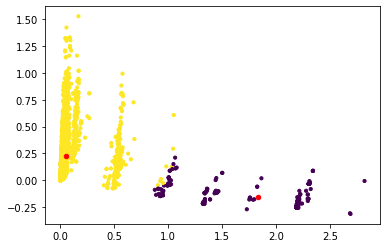

In [39]:
#plotting predicted clusters, cluster centers are larger red dots 

plt.scatter(X_tr_cv_SVD[:, 0], X_tr_cv_SVD[:, 1], c=predicted_clusters, s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=20)

In [34]:
type(y_train2

pandas.core.series.Series

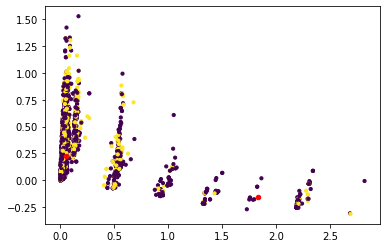

In [36]:
# plotting actual cluster target values, cluster centers from 
# predictions retained as larger red dots

plt.scatter(X_tr_cv_SVD[:, 0], X_tr_cv_SVD[:, 1], c=y_train2, s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=20)

# Baseline  
1 = none  
2 = positive  
0 = negative

In [23]:
y_train.value_counts(normalize=True)

1    0.602951
2    0.333226
0    0.063823
Name: emotion_label, dtype: float64

In [ ]:
y_train

# Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [27]:
desc_tree = DecisionTreeClassifier()
desc_tree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [28]:
tfidf_cv = cross_val_score(desc_tree, X_train_tfidf, y_train).mean()

In [29]:
tfidf_cv

0.6170619743795366

In [30]:
desc_tree_count = DecisionTreeClassifier()
desc_tree_count.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [31]:
count_cv = cross_val_score(desc_tree_count, X_train_cv, y_train)
count_cv

array([0.61858974, 0.6319166 , 0.63031275, 0.62469928, 0.62790698])

In [32]:
count_cv.mean()

0.6266850698085662

In [41]:
y_train.value_counts()

1    3760
2    2078
0     398
Name: emotion_label, dtype: int64